# Project : Fastcampus - 20개 실습으로 익히는 시퀀스 데이터 딥러닝의 모든 것

#### Summary: Train FeedForward Neural Network using Numpy

## 00. Environments

### 00-01. Packages

In [ ]:
import numpy as np
import pandas as pd

### 00-02. Variables

In [ ]:
learning_rate = 0.001
bias = 0.7
epochs = 50
final_epoch_loss = []

### 00-03. User-defined functions

generate_data(n_features, n_values)

In [ ]:
random_generator = np.random.default_rng()

def generate_data(n_features, n_values):
    weights = random_generator.random((1, n_values))[0]
    features = random_generator.random((n_features, n_values))
    targets = np.random.choice([0, 1], n_features)

    data = pd.DataFrame(features, columns=["n1", "n2", "n3", "n4"])
    data['target'] = targets

    return data, weights

#### get_weighted_sum(features, weights, bias)

In [ ]:
def get_weighted_sum(features, weights, bias):
    return np.dot(features, weights) + bias

#### sigmoid(x)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### cross_entropy_loss(target, prediction)

In [ ]:
def cross_entropy_loss(target, prediction):
    return - (target * np.log10(prediction) + (1-target) * np.log10(1-prediction))

#### update_weights(weights, learning_rate, target, prediction, feature)

In [ ]:
def update_weights(weights, learning_rate, target, prediction, feature):
    new_weights = []

    for input_x, old_weight in zip(feature, weights):
        new_weight = old_weight + learning_rate * (target - prediction) * input_x
        new_weights.append(new_weights)

    return new_weights

#### update_bias(bias, learning_rate, target, prediction)

In [ ]:
def update_bias(bias, learning_rate, target, prediction):
    return bias + learning_rate * (target - prediction)

#### train_model(data, weights, bias, learning_rate, epochs)

In [ ]:
def train_model(data, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        individual_loss = []

        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]

            w_sum = get_weighted_sum(features=feature, weights=weights, bias=bias)
            prediction = sigmoid(w_sum)

            loss = cross_entropy_loss(target, prediction)
            individual_loss.append(loss)

            weights = update_weights(weights, learning_rate, target, prediction, feature)
            bias = update_bias(bias, learning_rate, target, prediction)

        average_loss = sum(individual_loss) / len(individual_loss)
        final_epoch_loss.append(average_loss)

        print(f"******************************** Epoch: {epoch} , Loss:  {average_loss}")

## 01. FeedForward Neural Network

In [ ]:
data, weights = generate_data(500, 4)

In [ ]:
weights

array([0.32819209, 0.36051204, 0.28848275, 0.62524268])

In [ ]:
train_model(data, weights, bias, learning_rate, epochs)

******************************** Epoch: 0 , Loss:  0.3738042863603136
******************************** Epoch: 1 , Loss:  0.34900856414593084
******************************** Epoch: 2 , Loss:  0.33173679206811374
******************************** Epoch: 3 , Loss:  0.320155631081585
******************************** Epoch: 4 , Loss:  0.3126103472819438
******************************** Epoch: 5 , Loss:  0.30779278603491617
******************************** Epoch: 6 , Loss:  0.3047565334103792
******************************** Epoch: 7 , Loss:  0.3028563723106329
******************************** Epoch: 8 , Loss:  0.30166945566876613
******************************** Epoch: 9 , Loss:  0.30092578937859604
******************************** Epoch: 10 , Loss:  0.3004558907646475
******************************** Epoch: 11 , Loss:  0.30015453863624697
******************************** Epoch: 12 , Loss:  0.2999568631082196
******************************** Epoch: 13 , Loss:  0.29982303920558434
**********

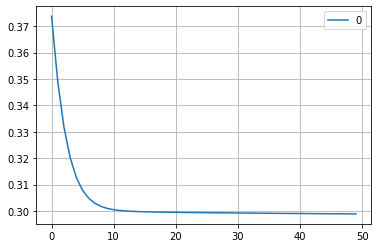

In [ ]:
df = pd.DataFrame(final_epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()